Support Vector Machines (SVM)

 1.Load and prepare a dataset for binary classification.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("breast-cancer.csv")

# Drop the 'id' column and map 'diagnosos' to binary labels
df.drop(columns=['id'], inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and labels
x = df.drop(columns='diagnosis')
y = df['diagnosis']

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


 2.Train an SVM with linear and RBF kernel.

In [4]:
from sklearn.svm import SVC

# Split for visualization
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Linear Kernal
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)

# RBF Kernal
svm_rbf= SVC(kernel='linear', C=1, gamma='scale')
svm_rbf.fit(x_train, y_train)

SVC(C=1, kernel='linear')

 3.Visualize decision boundary using 2D data.

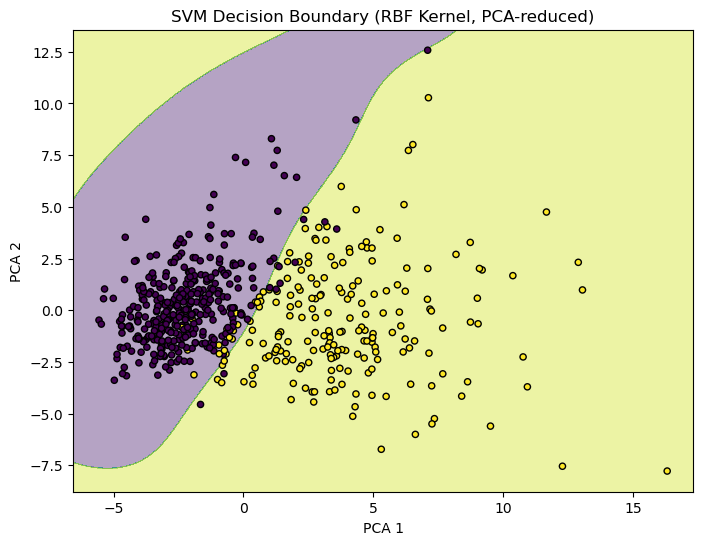

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Retrain on PCA components for visualization
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(x_pca, y)

# Plot
import numpy as np

def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title('SVM Decision Boundary (RBF Kernel, PCA-reduced)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_decision_boundary(svm_vis, x_pca, y)

 4.Tune hyperparameters like C and gamma.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_scaled, y)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accurarcy", grid.best_score_)

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accurarcy 0.9789318428815401


 5.Use cross-validation to evaluate performance.

In [9]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
scores = cross_val_score(best_model, x_scaled, y, cv=5)
print("Cross-validated accuracy: {:.2f} ± {:.2f}".format(scores.mean(), scores.std()))


Cross-validated accuracy: 0.98 ± 0.01
